      Reading#  Mote-ID      H      T  Label
0            1        1  45.93  27.97      0
1            2        1  45.90  27.95      0
2            3        1  45.90  27.96      0
3            4        1  45.93  27.95      0
4            5        1  45.93  27.97      0
...        ...      ...    ...    ...    ...
4412      4413        1  42.62  27.04      0
4413      4414        1  42.62  27.04      0
4414      4415        1  42.62  27.05      0
4415      4416        1  42.62  27.05      0
4416      4417        1  42.62  27.05      0

[4417 rows x 5 columns]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1289
           1       1.00      1.00      1.00        37

    accuracy                           1.00      1326
   macro avg       1.00      1.00      1.00      1326
weighted avg       1.00      1.00      1.00      1326



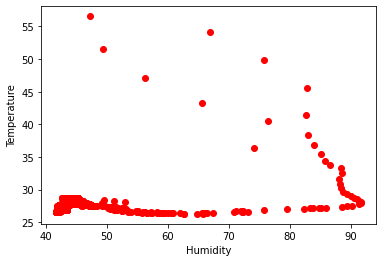

In [1]:
#The code starts here
#import the libraries that we will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#libraries specific to svm
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report


#Load our CSV file - the only line of code that needs to be changed
single_hop_data = pd.read_csv('singlehop-indoor-moteid4-data.csv')
print(single_hop_data)    #For code inspection purposes

columns_of_relevance, columns_for_training, dependent_labels = single_hop_data[['H','T','Label']], single_hop_data[['H','T']], single_hop_data['Label']
#now we need the associated values that correlates with the proper column

#recall the values method is used to list out all the values in a dictionary while not including the keys
characteristic = single_hop_data[list(columns_for_training)].values    #we converted the columns_for_training dataset into a list
dependent_labels = single_hop_data['Label'].values

#now we split the data into 70% training and 30% testing
X_train,X_test,y_train,y_test = train_test_split(characteristic, dependent_labels, test_size = 0.30)
#Now we model the SVM, we will use the svm subfucntion SVC(support vector classifier)
classifier = svm.SVC()

#now we train the model using SVM and the training dataset using the fit method
classifier.fit(X_train,y_train)
#now we predict the data using predict method which will take in the X_test values randomly selected to predict the labels based on the model trained on the code above
predicted_y_values = classifier.predict(X_test)
#now that we have the prediction, we will compared it to the actual dependent dataset for labels which will take in the (actual, predicted) parameters
#y_test represents the actual y values
print(classification_report(y_test, predicted_y_values))
#The code ends here

#plot the temperature vs Humidity graph
plt.scatter(single_hop_data['H'], single_hop_data['T'], color = 'red')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()